In [194]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

In [195]:
def reading(file):
    data = pd.read_csv(file, delimiter=';')
    data = data.apply(pd.to_numeric, errors='coerce')
    data.index = pd.RangeIndex(len(data.index))
    return data

In [196]:
# files with modelled stars
m_s = 'NGC2516_model_func_flat_singles.txt'
m_b = 'NGC2516_model_func_flat_binaries.txt'
#files with modelled stars that were separated like real
m_r_s = 'NGC2516_model_func_flat_singles_func_flat_reseparated_singles.txt'
m_r_b = 'NGC2516_model_func_flat_singles_func_flat_reseparated_binaries.txt'
#files with real stars
f_s = 'NGC2516_100m_selected_parallax_0.2_pm_inRA_1.5_pm_inDEC_1.5_CMD_cutted_18.6811_CMD_separated_singles.txt'
f_b = 'NGC2516_100m_selected_parallax_0.2_pm_inRA_1.5_pm_inDEC_1.5_CMD_cutted_18.6811_CMD_separated_binaries.txt'

m_singles = reading(m_s)    
m_binaries = reading (m_b)

m_r_singles = reading(m_r_s)    
m_r_binaries = reading (m_r_b)


singles = pd.read_csv(f_s, delimiter=';', header = None)
singles = singles.apply(pd.to_numeric, errors='coerce')
singles.index = pd.RangeIndex(len(singles.index))

binaries = pd.read_csv(f_b, delimiter=';', header = None)
binaries = binaries.apply(pd.to_numeric, errors='coerce')
binaries.index = pd.RangeIndex(len(binaries.index))

singles.rename(columns = {21 : 'BP-RP, mag', 15 : 'G, mag', 16: 'err_G', 18 : 'err_BP', 20 : 'err_RP'}, inplace=True)
binaries.rename(columns = {21 : 'BP-RP, mag', 15 : 'G, mag', 16: 'err_G', 18 : 'err_BP', 20 : 'err_RP'}, inplace=True)

In [197]:
singles = singles[singles['G, mag']<=18]
binaries = binaries[binaries['G, mag']<=18]

In [198]:
m_binaries['G, mag'] += 5 * np.log10(410) - 5 + 3.1*0.13*0.86
m_r_binaries

,"G, mag","BP-RP, mag"
0,10.999954,0.702097
1,11.421247,0.775448
2,7.699111,0.067178
3,10.840957,0.578770
4,10.953344,0.616642
5,11.027551,0.643659
6,10.533578,0.485402
7,11.069626,0.662878
8,9.873787,0.224291
9,10.797963,0.545886


In [199]:
delta = 15

In [200]:
m_binaries['bin'] = pd.cut(bins=np.linspace(binaries['G, mag'].min(), singles['G, mag'].max() , delta + 1), x=m_binaries['G, mag'],include_lowest=True) 
m_r_binaries['bin'] = pd.cut(bins=np.linspace(binaries['G, mag'].min(), singles['G, mag'].max() , delta + 1), x=m_r_binaries['G, mag'],include_lowest=True) 


step = (singles['G, mag'].max() - singles['G, mag'].min()) / delta
epsilon = pd.DataFrame(data = {'G, mag' : np.linspace(singles['G, mag'].min(), singles['G, mag'].max(), num = delta + 1, dtype=None)+step/2}).drop(delta)


In [201]:
epsilon['epsilon'] = m_binaries.groupby('bin')['G, mag'].count().get_values()/(m_r_binaries.groupby('bin')['G, mag'].count().get_values())

In [202]:
m_r_binaries.groupby('bin')['G, mag'].count().get_values()

array([ 1,  1,  2,  1,  3, 11,  7, 15,  6, 14, 17, 19, 27, 30, 16],
      dtype=int64)

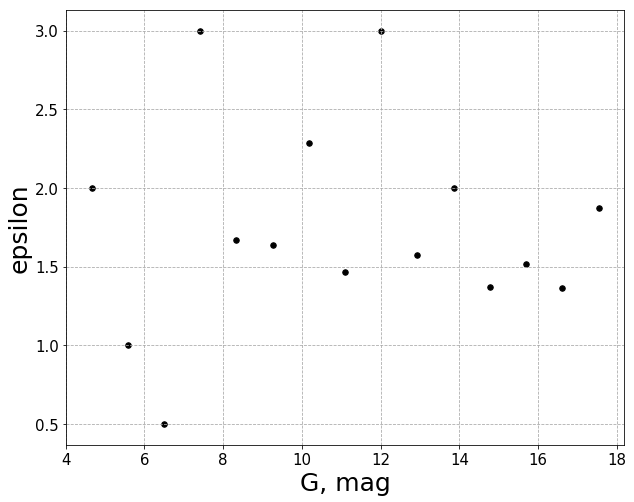

In [203]:
fig, ax = plt.subplots(figsize=(10,8 )) #16:14
ax.scatter(epsilon['G, mag'] , epsilon['epsilon'] , c ='black', s=30)
ax.grid(c='#aaaaaa', ls='--') 
locs, labels = plt.yticks()
locs, labels = plt.xticks()
plt.xlabel("G, mag", size = 25)
plt.ylabel("epsilon", size = 25)
ax.tick_params(axis='both', which='major', labelsize=15)
plt.savefig("epsilon_dist.png", dpi = 200)

In [204]:
binaries['bin'] = pd.cut(bins=np.linspace(binaries['G, mag'].min(), singles['G, mag'].max() , delta + 1), x=binaries['G, mag'],include_lowest=True) 

In [210]:
epsilon[epsilon['epsilon']== np.inf] = 1
epsilon[epsilon['epsilon']<1] = 1
epsilon['num_sin_to_bin'] = binaries.groupby('bin')['G, mag'].count().get_values()*epsilon['epsilon'] - binaries.groupby('bin')['G, mag'].count().get_values()

In [211]:
epsilon

,"G, mag",epsilon,num_sin_to_bin
0,4.658613,2.000000,5.000000
1,5.578440,1.000000,0.000000
2,1.000000,1.000000,0.000000
3,7.418093,3.000000,14.000000
4,8.337920,1.666667,1.333333
5,9.257747,1.636364,7.636364
6,10.177573,2.285714,14.142857
7,11.097400,1.466667,7.933333
8,12.017227,3.000000,20.000000
9,12.937053,1.571429,10.857143


In [212]:
singles['bin'] = pd.cut(bins=np.linspace(binaries['G, mag'].min(), singles['G, mag'].max() , delta + 1), x=singles['G, mag'],include_lowest=True) 

In [213]:
import random

In [214]:
g_singles = singles.copy()
g_binaries = binaries.copy()
g_singles['type'] = 'single'
g_binaries['type'] = 'binary'

result = []
for num, grouper in zip(epsilon['num_sin_to_bin'], g_singles.groupby('bin')):
    name, group = grouper
    if num >= len(group):
        num = num*0.5
    num = int(num)
    #num = int(min(num, len(group)))
    group = group.copy()
    group.loc[random.sample(group.index.tolist(), num), 'type'] = 'binary'
    result.append(group)

In [215]:
g_singles = pd.concat(result)

In [216]:
george = pd.concat([g_singles, g_binaries])
george.set_index('type', inplace=True, append=True)
george = george.swaplevel(0, 1).sort_index()

In [217]:
george.groupby('type').size()

type
binary     468
single    1034
dtype: int64

In [218]:
g_singles = george.loc['single'].copy()
g_binaries = george.loc['binary'].copy()

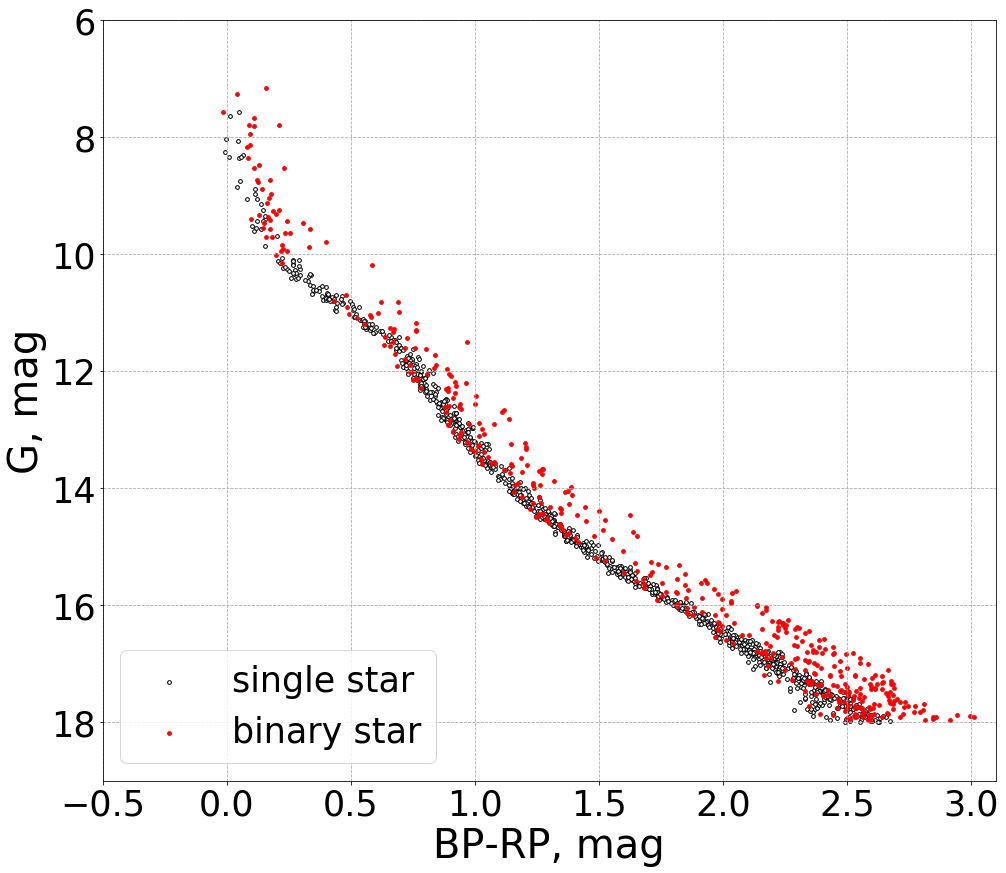

In [227]:
fig, ax = plt.subplots(figsize=(16,14 )) #16:14
ax.scatter (g_singles['BP-RP, mag'], g_singles['G, mag'] ,facecolor='white', edgecolor='black', s = 14, label = 'single star')
ax.scatter (g_binaries['BP-RP, mag'], g_binaries['G, mag'], c ='red', s = 14, label = 'binary star')
ax.invert_yaxis()
ax.grid(c='#aaaaaa', ls='--')
ax.legend(fontsize = 35, loc = 'lower left')
plt.xticks(np.arange(-0.5, 3.1, step=0.5))
ax.set_ylim(19, 6)
ax.set_xlim(-0.5, 3.1)
plt.xlabel("BP-RP, mag", size = 40)
plt.ylabel("G, mag", size = 40)
ax.tick_params(axis='both', which='major', labelsize=35)
plt.savefig("NGC_2516_reseparated_CMD_plot.png", dpi = 200)

In [221]:
pd.concat([g_binaries, binaries[binaries['G, mag']>18]]).to_csv(f"NGC2516_{m_s.split('_')[2]}_{m_s.split('_')[3]}_reseparated_binaries.txt", sep=';', index=False)
pd.concat([g_singles, singles[singles['G, mag']>18]]).to_csv(f"NGC2516_{m_s.split('_')[2]}_{m_s.split('_')[3]}_reseparated_singles.txt", sep=';', index=False)